# Advanced quantitative techniques - Class 9 - Propensity scores, first differences, fixed effects, random effects models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import QMSS as qmss

## 1. Propensity score matching

In [213]:
# since the GSS_Cum file is quite large, we will only read in the columns that we need
GSS = pd.read_csv('Data/GSS_Cum.csv', usecols=['year', 'happy', 'marital', 'born', 'parborn', 'region', 'wordsum', 'educ', 'paeduc', 
             'madeg', 'incom16', 'sex'])
sub = GSS.dropna().copy()

In [214]:
sub['n_happy'] = qmss.reverse_this(sub['happy'])
sub['dm1'] = sub.marital==1
sub['db1'] = sub.born==1
sub['df1'] = sub.parborn==0
sub['f_region'] = sub.region.astype('category')

In [19]:
from statsmodels.regression.linear_model import OLS

# OLS for men
OLS.from_formula('n_happy ~ dm1 + wordsum + db1 + df1 + educ + paeduc + madeg + incom16 + f_region', 
                 data=sub[sub.sex==1]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     18.88
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           5.11e-53
Time:                        23:40:48   Log-Likelihood:                -4553.9
No. Observations:                5028   AIC:                             9142.
Df Residuals:                    5011   BIC:                             9253.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7300      0.067     25.803      0.000       1.599       1.861
dm1[T.True]       0.2640      0.018     15.057      0.000       0.230       0.298
db1[T.True]       0.0476      0.040      1.196      0.232      -0.030       0.126
df1[T.True]      -0.0077      0.029     -0.263      0.792      -0.065       0.050
f_region[T.2]    -0.0278      0.046     -0.600      0.548      -0.118       0.063
f_region[T.3]    -0.0589      0.044     -1.327      0.185      -0.146       0.028
f_region[T.4]    -0.0269      0.049     -0.544      0.587      -0.124       0.070
f_region[T.5]     0.0041      0.045      0.091      0.927      -0.084       0.092
f_region[T.6]     0.0123      0.054      0.228      0.819      -0.093       0.118
f_region[T.7]     0.0488      0.049      0.996      0.319      -0.047       0.145
f_region[T.8]     0.0491      0.052      0.954      0.340      -0.052       0.150
f_region[T.9]    -0.0152      0.046     -0.331      0.740      -0.105       0.075
wordsum           0.0003      0.005      0.067      0.946      -0.009       0.010
educ              0.0115      0.003      3.375      0.001       0.005       0.018
paeduc           -0.0018      0.003     -0.678      0.498      -0.007       0.003
madeg             0.0237      0.010      2.259      0.024       0.003       0.044
incom16           0.0458      0.011      4.251      0.000       0.025       0.067
==============================================================================
Omnibus:                      116.898   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.475
Skew:                          -0.138   Prob(JB):                     4.97e-16
Kurtosis:                       2.490   Cond. No.                         284.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# OLS for women
OLS.from_formula('n_happy ~ dm1 + wordsum + db1 + df1 + educ + paeduc + madeg + incom16 + f_region', 
                 data=sub[sub.sex==2]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     29.19
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           7.39e-86
Time:                        23:47:02   Log-Likelihood:                -5673.3
No. Observations:                6278   AIC:                         1.138e+04
Df Residuals:                    6261   BIC:                         1.150e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6008      0.061     26.064      0.000       1.480       1.721
dm1[T.True]        0.2824      0.015     18.568      0.000       0.253       0.312
db1[T.True]        0.1439      0.037      3.928      0.000       0.072       0.216
df1[T.True]       -0.0311      0.027     -1.170      0.242      -0.083       0.021
C(region)[T.2]    -0.0315      0.039     -0.804      0.422      -0.108       0.045
C(region)[T.3]     0.0132      0.038      0.348      0.728      -0.061       0.088
C(region)[T.4]     0.0232      0.043      0.545      0.586      -0.060       0.107
C(region)[T.5]     0.0093      0.038      0.245      0.807      -0.065       0.084
C(region)[T.6]     0.0712      0.045      1.578      0.115      -0.017       0.160
C(region)[T.7]    -0.0043      0.042     -0.102      0.919      -0.087       0.078
C(region)[T.8]     0.0092      0.044      0.208      0.835      -0.078       0.096
C(region)[T.9]    -0.0046      0.039     -0.118      0.906      -0.082       0.073
wordsum            0.0019      0.004      0.454      0.650      -0.006       0.010
educ               0.0146      0.003      4.336      0.000       0.008       0.021
paeduc             0.0046      0.002      1.955      0.051   -1.25e-05       0.009
madeg              0.0051      0.010      0.531      0.595      -0.014       0.024
incom16            0.0382      0.010      3.871      0.000       0.019       0.058
==============================================================================
Omnibus:                      179.616   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.553
Skew:                          -0.163   Prob(JB):                     1.20e-23
Kurtosis:                       2.455   Cond. No.                         266.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# OLS overall
ols_all = OLS.from_formula('n_happy ~ dm1 + wordsum + db1 + df1 + educ + paeduc + madeg + incom16 + f_region', data=sub).fit()
ols_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     45.88
Date:                Tue, 21 Aug 2018   Prob (F-statistic):          4.19e-141
Time:                        15:13:08   Log-Likelihood:                -10247.
No. Observations:               11306   AIC:                         2.053e+04
Df Residuals:                   11289   BIC:                         2.065e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6689      0.045     36.956      0.000       1.580       1.757
dm1[T.True]       0.2720      0.011     23.757      0.000       0.250       0.294
db1[T.True]       0.0984      0.027      3.649      0.000       0.046       0.151
df1[T.True]      -0.0206      0.020     -1.045      0.296      -0.059       0.018
f_region[T.2]    -0.0302      0.030     -1.010      0.313      -0.089       0.028
f_region[T.3]    -0.0214      0.029     -0.741      0.459      -0.078       0.035
f_region[T.4]    -0.0013      0.032     -0.039      0.969      -0.065       0.062
f_region[T.5]     0.0070      0.029      0.242      0.808      -0.050       0.064
f_region[T.6]     0.0485      0.035      1.402      0.161      -0.019       0.116
f_region[T.7]     0.0190      0.032      0.594      0.553      -0.044       0.082
f_region[T.8]     0.0257      0.034      0.766      0.444      -0.040       0.092
f_region[T.9]    -0.0107      0.030     -0.359      0.719      -0.069       0.048
wordsum           0.0024      0.003      0.746      0.456      -0.004       0.009
educ              0.0121      0.002      5.079      0.000       0.007       0.017
paeduc            0.0019      0.002      1.093      0.274      -0.002       0.005
madeg             0.0131      0.007      1.862      0.063      -0.001       0.027
incom16           0.0416      0.007      5.705      0.000       0.027       0.056
==============================================================================
Omnibus:                      303.971   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.749
Skew:                          -0.150   Prob(JB):                     2.52e-39
Kurtosis:                       2.464   Cond. No.                         274.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Propensity score matching

In [23]:
propensity_model = smf.glm('dm1 ~ wordsum + db1 + df1 + educ + paeduc + madeg + incom16 + f_region', 
                          data=sub, family=sm.families.Binomial()).fit()

In [24]:
Y = sub.n_happy
Tr = sub.dm1
pscore = propensity_model.fittedvalues

In [33]:
test = sub[sub.dm1==True].copy()
control = sub[sub.dm1!=True].copy()
test['dm1'] = 1
control['dm1'] = 0

In [43]:
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
m = Matcher(test, control, yvar='dm1', exclude=['n_happy', 'happy', 'year', 'marital', 'sex', 'born', 'parborn', 'region'])

Formula:
dm1 ~ educ+paeduc+madeg+incom16+wordsum+db1+df1+f_region
n majority: 6323
n minority: 4983


In [59]:
np.random.seed(11)

m.predict_scores()

In [62]:
m.match(method='min', nmatches=1, threshold=0.0001)

In [63]:
m.matched_data.sort_values('match_id').head(10)

,year,marital,educ,paeduc,madeg,sex,incom16,born,parborn,region,happy,wordsum,n_happy,dm1,db1,df1,f_region,scores,match_id,record_id
0,1978,1.0,12.0,12.0,1.0,2,3.0,1.0,0.0,1,2.0,10.0,2.0,1,True,True,1,0.554023,0,0
9203,1993,3.0,16.0,12.0,1.0,1,2.0,1.0,0.0,3,1.0,8.0,3.0,0,True,True,3,0.554004,0,9203
1,1978,1.0,12.0,9.0,0.0,2,3.0,1.0,0.0,1,1.0,9.0,3.0,1,True,True,1,0.588760,1,1
7207,1984,4.0,11.0,0.0,0.0,2,1.0,1.0,0.0,2,2.0,5.0,2.0,0,True,True,2,0.588748,1,7207
2,1978,1.0,16.0,16.0,1.0,2,4.0,1.0,0.0,1,2.0,8.0,2.0,1,True,True,1,0.507895,2,2
9876,2006,3.0,17.0,8.0,1.0,1,4.0,1.0,0.0,1,2.0,5.0,2.0,0,True,True,1,0.507984,2,9876
3,1978,1.0,17.0,12.0,0.0,1,3.0,1.0,0.0,1,1.0,6.0,3.0,1,True,True,1,0.561958,3,3
9795,2006,4.0,16.0,14.0,1.0,1,2.0,1.0,0.0,5,1.0,8.0,3.0,0,True,True,5,0.561900,3,9795
4,1978,1.0,18.0,8.0,1.0,1,3.0,1.0,0.0,1,3.0,9.0,1.0,1,True,True,1,0.604096,4,4
7012,1982,2.0,17.0,8.0,0.0,2,3.0,1.0,0.0,9,2.0,10.0,2.0,0,True,True,9,0.604111,4,7012


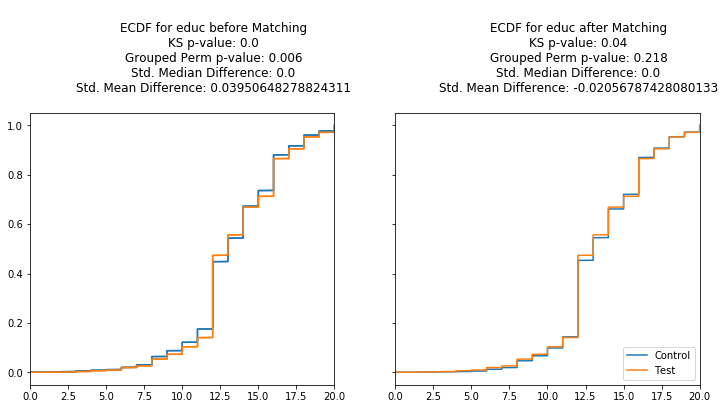

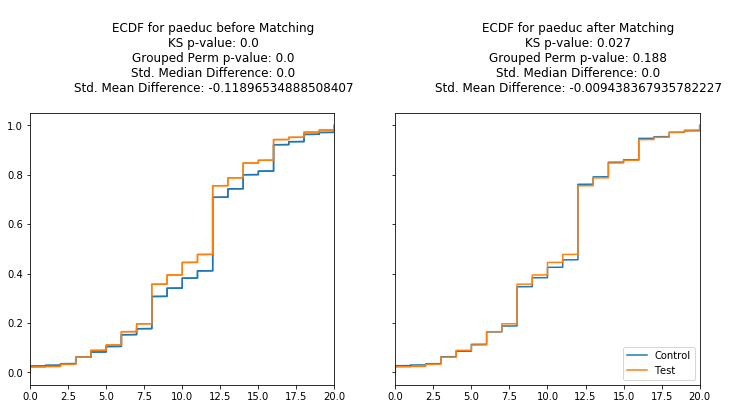

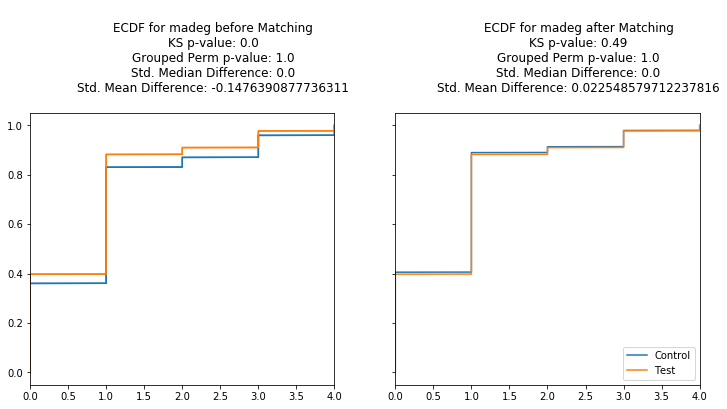

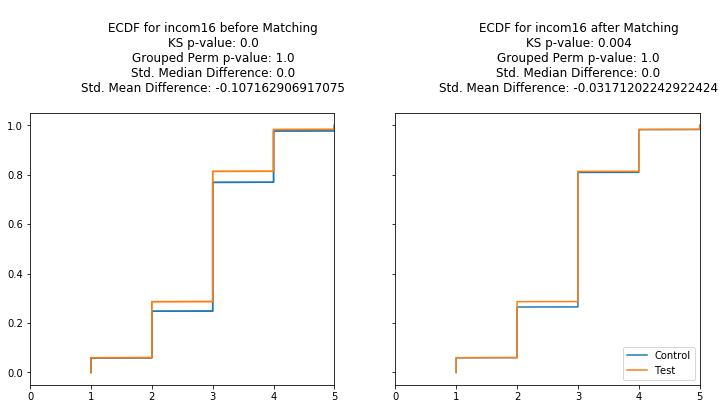

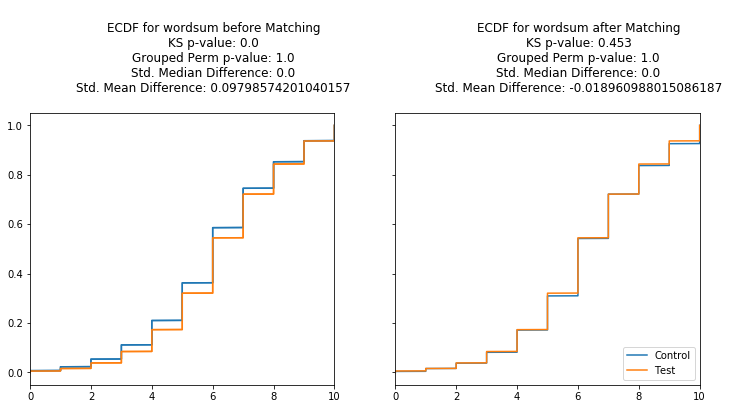

In [64]:
cc = m.compare_continuous(return_table=True)

In [51]:
cc

,var,ks_before,ks_after,grouped_chisqr_before,grouped_chisqr_after,std_median_diff_before,std_median_diff_after,std_mean_diff_before,std_mean_diff_after
0,educ,0.0,0.000,0.005,0.432,0.0,0.0,0.039506,-0.016529
1,paeduc,0.0,0.000,0.000,0.025,0.0,0.0,-0.118965,-0.012646
2,madeg,0.0,0.319,1.000,1.000,0.0,0.0,-0.147639,0.019101
3,incom16,0.0,0.017,1.000,1.000,0.0,0.0,-0.107163,-0.047018
4,wordsum,0.0,0.664,1.000,1.000,0.0,0.0,0.097986,-0.019674


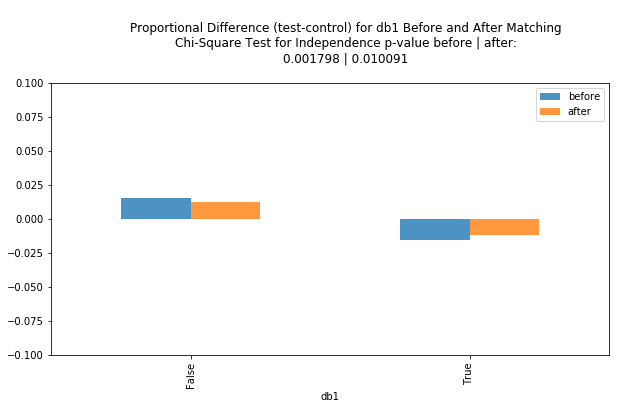

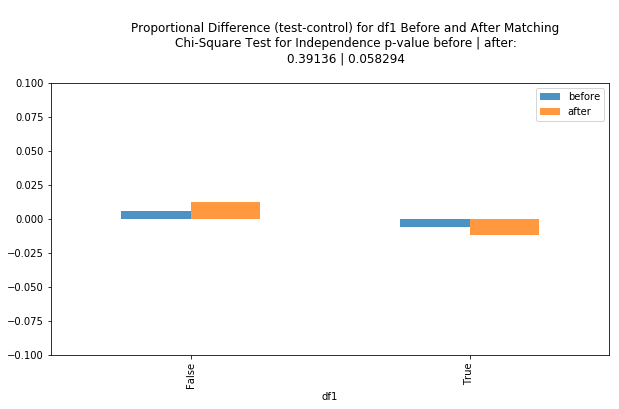

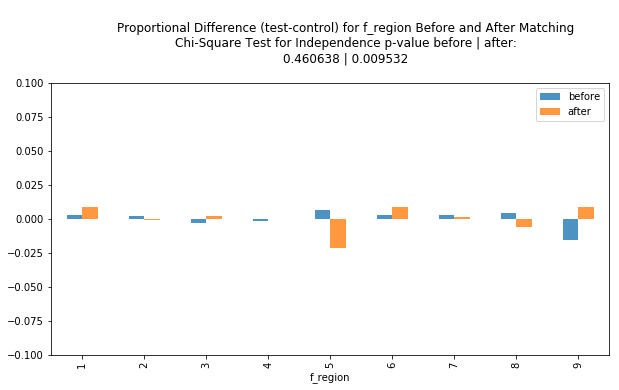

In [56]:
categorical_results = m.compare_categorical(return_table=True)

In [57]:
categorical_results

,var,before,after
0,db1,0.001798,0.010091
1,df1,0.391360,0.058294
2,f_region,0.460638,0.009532


### Estimate the size of the treatment on the treated

`pymatch` doesn't have a function to produce a summary output for the estimated ATT. To get this, we can use another Python library called `causalinference`   

(slide 20)

In [215]:
from causalinference import CausalModel

Y = sub.n_happy.values

D = sub.dm1.values

X = sub[['wordsum', 'db1', 'df1', 'educ', 'paeduc', 'madeg', 'incom16', 'f_region']].values
X = np.array(X, dtype=np.float32)

causal = CausalModel(Y, D, X)

In [219]:
causal.est_via_ols()
print(causal.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.273      0.011     23.803      0.000      0.251      0.296
           ATC      0.271      0.012     23.519      0.000      0.248      0.293
           ATT      0.275      0.012     23.690      0.000      0.252      0.298



## 2. A first differences example - financial satisfaction

In [5]:
panel = pd.read_csv('Data/panel-for-R.csv')
variables = ['idnum', 'panelwave', 'satfin', 'realinc', 'marital']
sub = panel[variables].copy()

In [7]:
# slide 30

# recoding `satfin`
sub['n_satfin'] = qmss.reverse_this(sub.satfin)

In [8]:
sub.n_satfin.value_counts()

2.0    2102
3.0    1375
1.0    1320
Name: n_satfin, dtype: int64

In [9]:
sub.satfin.value_counts()

2.0    2102
1.0    1375
3.0    1320
Name: satfin, dtype: int64

In [11]:
#slide 31

sub['realinc10k'] = sub.realinc/10000

pd_sub = sub[['idnum', 'panelwave', 'n_satfin', 'realinc10k']]

# convert to multiindex dataframe for time series models
pd_sub.set_index(['idnum', 'panelwave'], inplace=True, drop=False)

In [14]:
from linearmodels import PooledOLS

ols_satfin = PooledOLS.from_formula('n_satfin ~ 1 + realinc10k', data=pd_sub).fit(cov_type = 'clustered', cluster_entity = True)
ols_satfin

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,n_satfin,R-squared:,0.0948
Estimator:,PooledOLS,R-squared (Between):,0.1199
No. Observations:,4269,R-squared (Within):,0.0117
Date:,"Wed, Aug 15 2018",R-squared (Overall):,0.0948
Time:,22:48:50,Log-likelihood,-4620.0
Cov. Estimator:,Clustered,,
,,F-statistic:,446.80
Entities:,1879,P-value,0.0000
Avg Obs:,2.2720,Distribution:,"F(1,4267)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,318.02


In [16]:
# slide 49

pooled_satfin = PooledOLS.from_formula('n_satfin ~ 1 + realinc10k + C(panelwave)', data=pd_sub).fit()
pooled_satfin

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,n_satfin,R-squared:,0.0963
Estimator:,PooledOLS,R-squared (Between):,0.1227
No. Observations:,4269,R-squared (Within):,0.0130
Date:,"Wed, Aug 15 2018",R-squared (Overall):,0.0963
Time:,23:02:24,Log-likelihood,-4616.6
Cov. Estimator:,Unadjusted,,
,,F-statistic:,151.43
Entities:,1879,P-value,0.0000
Avg Obs:,2.2720,Distribution:,"F(3,4265)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,151.43


In [17]:
from linearmodels import FirstDifferenceOLS

fd_satfin = FirstDifferenceOLS.from_formula('n_satfin ~ realinc10k + C(panelwave)', data=pd_sub).fit()
fd_satfin

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


ValueError: Constants are not allowed in first difference regressions.

Skipping slides 57-67 that are for teaching purposes only

### Multivariate fixed effects models

Use `PanelOLS` from the `linearmodels` module to estimate fixed effects. Add `EntityEffects` to the formula to include entity (fixed) effects in the model. 

In [23]:
# slide 73 

from linearmodels import PanelOLS
fe_satfin2 = PanelOLS.from_formula('n_satfin ~ 1 + realinc10k + C(panelwave) + EntityEffects', data = pd_sub).fit()
fe_satfin2

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,n_satfin,R-squared:,0.0219
Estimator:,PanelOLS,R-squared (Between):,0.1001
No. Observations:,4269,R-squared (Within):,0.0219
Date:,"Wed, Aug 15 2018",R-squared (Overall):,0.0814
Time:,23:13:58,Log-likelihood,-2192.7
Cov. Estimator:,Unadjusted,,
,,F-statistic:,17.808
Entities:,1879,P-value,0.0000
Avg Obs:,2.2720,Distribution:,"F(3,2387)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,17.808


## Random effects vs. fixed effects

In [37]:
# slide 98

variables = ['idnum', 'panelwave', 'marital', 'marhomo']
pd_sub = panel[variables].copy()

pd_sub['married'] = np.where(pd.isnull(pd_sub.marital), np.nan, 
                            np.where(pd_sub.marital==1, 1, 0))

pd_sub.married.value_counts()

0.0    2455
1.0    2353
Name: married, dtype: int64

In [38]:
# create first difference columns for 'married' and 'marhomo'
pd_sub['d_married'] = pd_sub.groupby('idnum')['married'].diff()
pd_sub['d_marhomo'] = pd_sub.groupby('idnum')['marhomo'].diff()

In [39]:
pd_sub.d_married.value_counts()

 0.0    2573
 1.0     118
-1.0     117
Name: d_married, dtype: int64

In [40]:
# slide 99
pd_sub.d_marhomo.value_counts()

 0.0    987
-1.0    332
 1.0    285
-2.0    109
 2.0     61
-3.0     45
 3.0     30
 4.0     16
-4.0     12
Name: d_marhomo, dtype: int64

In [41]:
pd_sub = pd_sub.set_index(['idnum', 'panelwave'], drop=False)

### The naive (cross-sectional) OLS

In [42]:
# slide 101

ols_marhomo = PooledOLS.from_formula('marhomo ~ 1 + married + C(panelwave)', data=pd_sub).fit(cov_type = 'clustered', cluster_entity = True)
ols_marhomo

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,marhomo,R-squared:,0.0161
Estimator:,PooledOLS,R-squared (Between):,0.0194
No. Observations:,3232,R-squared (Within):,0.0084
Date:,"Thu, Aug 16 2018",R-squared (Overall):,0.0161
Time:,11:48:56,Log-likelihood,-5877.4
Cov. Estimator:,Clustered,,
,,F-statistic:,17.610
Entities:,1352,P-value,0.0000
Avg Obs:,2.3905,Distribution:,"F(3,3228)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,12.784


### The fixed effects approach

In [54]:
# slide 104

fe_marhomo = PanelOLS.from_formula('marhomo ~ 1 + married + C(panelwave) + EntityEffects', data=pd_sub).fit()
fe_marhomo

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,marhomo,R-squared:,0.0120
Estimator:,PanelOLS,R-squared (Between):,0.0104
No. Observations:,3232,R-squared (Within):,0.0120
Date:,"Thu, Aug 16 2018",R-squared (Overall):,0.0100
Time:,11:55:24,Log-likelihood,-3091.0
Cov. Estimator:,Unadjusted,,
,,F-statistic:,7.6189
Entities:,1352,P-value,0.0000
Avg Obs:,2.3905,Distribution:,"F(3,1877)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,7.6189


In [59]:
print('sigma_u =', round(np.sqrt(fe_marhomo.variance_decomposition[0]), 5))
print('sigma_e =', round(np.sqrt(fe_marhomo.variance_decomposition[1]), 5))
print('rho =', round(fe_marhomo.variance_decomposition[2], 5))

sigma_u = 1.35681
sigma_e = 0.62966
rho = 0.8228


### The random effects approach

In [65]:
# slide 115

from linearmodels import RandomEffects

re_marhomo = RandomEffects.from_formula('marhomo ~ 1 + married + C(panelwave)', data=pd_sub).fit()
re_marhomo.variance_decomposition

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Effects                   1.533741
Residual                  0.682683
Percent due to Effects    0.691989
Name: Variance Decomposition, dtype: float64

In [66]:
re_marhomo

Dep. Variable:,marhomo,R-squared:,0.0731
Estimator:,RandomEffects,R-squared (Between):,0.0178
No. Observations:,3232,R-squared (Within):,0.0105
Date:,"Thu, Aug 16 2018",R-squared (Overall):,0.0154
Time:,13:32:29,Log-likelihood,-3969.7
Cov. Estimator:,Unadjusted,,
,,F-statistic:,84.867
Entities:,1352,P-value,0.0000
Avg Obs:,2.3905,Distribution:,"F(3,3228)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,14.563


In [63]:
print('Total sum of squares: ', re_marhomo.total_ss)
print('Residual sum of squares: ', re_marhomo.resid_ss)

Total sum of squares:  2381.2507995349124
Residual sum of squares:  2207.1659582172542


In [67]:
print('sigma_u =', round(np.sqrt(re_marhomo.variance_decomposition[0]), 5))
print('sigma_e =', round(np.sqrt(re_marhomo.variance_decomposition[1]), 5))
print('rho =', round(re_marhomo.variance_decomposition[2], 5))

sigma_u = 1.23844
sigma_e = 0.82625
rho = 0.69199


### The Hausman test

The Hausman test can be performed using the following function borrowed from https://github.com/sglyon/econtools/blob/master/Python/econtools/metrics.py  
(The function had to be revised slightly because `statsmodels.regression.linear_panel.PanelLMRandomResults` has been deprecated.)

In [72]:
import numpy.linalg as la
from scipy import stats

def hausman(fe, re):
    """
    Compute hausman test for fixed effects/random effects models
    b = beta_fe
    B = beta_re
    From theory we have that b is always consistent, but B is consistent
    under the alternative hypothesis and efficient under the null.
    The test statistic is computed as
    z = (b - B)' [V_b - v_B^{-1}](b - B)
    The statistic is distributed z \sim \chi^2(k), where k is the number
    of regressors in the model.
    Parameters
    ==========
    fe : statsmodels.regression.linear_panel.PanelLMWithinResults
        The results obtained by using sm.PanelLM with the
        method='within' option.
    re : statsmodels.regression.linear_panel.PanelLMRandomResults
        The results obtained by using sm.PanelLM with the
        method='swar' option.
    Returns
    =======
    chi2 : float
        The test statistic
    df : int
        The number of degrees of freedom for the distribution of the
        test statistic
    pval : float
        The p-value associated with the null hypothesis
    Notes
    =====
    The null hypothesis supports the claim that the random effects
    estimator is "better". If we reject this hypothesis it is the same
    as saying we should be using fixed effects because there are
    systematic differences in the coefficients.
    """

    # Pull data out
    b = fe.params.values
    B = re.params.values
    v_b = fe.cov.values
    v_B = re.cov.values

    # NOTE: find df. fe should toss time-invariant variables, but it
    #       doesn't. It does return garbage so we use that to filter
    df = b[np.abs(b) < 1e8].size

    # compute test statistic and associated p-value
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))
    pval = stats.chi2.sf(chi2, df)

    return chi2, df, pval

In [73]:
hausman(fe_marhomo, re_marhomo)

(6.085873153637998, 4, 0.19282634278405492)

### A bigger random effects model with additional variables

In [82]:
# Add on the "black" and "sex" variables:
panel.set_index(['idnum', 'panelwave'], drop=False, inplace=True)

pd_sub['black'] = np.where(pd.isnull(panel.race), np.nan, 
                          np.where(panel.race==2, 1, 0))
pd_sub['sex'] = panel.sex

re_marhomo2 = RandomEffects.from_formula('marhomo ~ 1 + married + C(panelwave) + sex + black', data=pd_sub).fit()
re_marhomo2

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,marhomo,R-squared:,0.0811
Estimator:,RandomEffects,R-squared (Between):,0.0450
No. Observations:,3232,R-squared (Within):,0.0044
Date:,"Thu, Aug 16 2018",R-squared (Overall):,0.0385
Time:,13:46:46,Log-likelihood,-3973.5
Cov. Estimator:,Unadjusted,,
,,F-statistic:,56.959
Entities:,1352,P-value,0.0000
Avg Obs:,2.3905,Distribution:,"F(5,3226)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,14.384


In [83]:
print('Total sum of squares: ', re_marhomo2.total_ss)
print('Residual sum of squares: ', re_marhomo2.resid_ss)

Total sum of squares:  2407.6320599945225
Residual sum of squares:  2212.325042514517


In [84]:
print('sigma_u =', round(np.sqrt(re_marhomo2.variance_decomposition[0]), 5))
print('sigma_e =', round(np.sqrt(re_marhomo2.variance_decomposition[1]), 5))
print('rho =', round(re_marhomo2.variance_decomposition[2], 5))

sigma_u = 1.2168
sigma_e = 0.8247
rho = 0.68523


In [116]:
# slide 126 SUPPOSED TO USED FIRST DIFFERENCE OLS
fd_marhomo = PanelOLS.from_formula('d_marhomo ~ 1 + d_married + EntityEffects', data=pd_sub).fit(cov_type = 'clustered', cluster_entity = True)
fd_marhomo

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,d_marhomo,R-squared:,0.0078
Estimator:,PanelOLS,R-squared (Between):,-0.0081
No. Observations:,1875,R-squared (Within):,0.0078
Date:,"Thu, Aug 16 2018",R-squared (Overall):,0.0012
Time:,14:18:49,Log-likelihood,-2446.8
Cov. Estimator:,Clustered,,
,,F-statistic:,6.5960
Entities:,1031,P-value,0.0104
Avg Obs:,1.8186,Distribution:,"F(1,843)"
Min Obs:,1.0000,,
Max Obs:,2.0000,F-statistic (robust):,5.8324


In [108]:
FirstDifferenceOLS.from_formula('d_marhomo ~ d_married', data=pd_sub).fit()

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/panel/model.py:1567: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  y = self.dependent.first_difference()
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/panel/data.py:568: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensiona

Dep. Variable:,d_marhomo,R-squared:,0.0078
Estimator:,FirstDifferenceOLS,R-squared (Between):,-0.0083
No. Observations:,844,R-squared (Within):,0.0078
Date:,"Thu, Aug 16 2018",R-squared (Overall):,0.0011
Time:,14:14:55,Log-likelihood,-1730.7
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6.5960
Entities:,1031,P-value,0.0104
Avg Obs:,1.8186,Distribution:,"F(1,843)"
Min Obs:,1.0000,,
Max Obs:,2.0000,F-statistic (robust):,6.5960


In [88]:
FirstDifferenceOLS.from_formula('d_marhomo ~ d_married', data=pd_sub[pd_sub.panelwave==3]).fit()

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


ValueError: Panel must have at least 2 time periods